In [3]:
import os
import pickle 
import sdv.metrics
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import time
from scipy.stats import multivariate_normal
import seaborn as sns
from sklearn.ensemble import IsolationForest

In [4]:
import warnings

warnings.filterwarnings(action='ignore')

dirpath = "C:/Users/2jjsj/"

rawdata = pd.read_csv(dirpath + "2016_housemasterdata.csv" , encoding = 'CP949')

In [95]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/HANBatang.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [5]:
from sdv.tabular import CTGAN 

In [60]:
num_variable = ["MD제공용_가구고유번호","수도권여부" , "가구주_성별코드", "가구주_교육정도_학력코드" , "가구주_연령10세단위코드" , '경상소득(조사)', "경상소득_근로소득(조사)" , "경상소득_사업소득(조사)", "경상소득_재산소득(조사)" , "경상소득_공적이전소득(조사)" , "경상소득_사적이전소득(조사)[가구간이전소득+비영리단체이전소득]"]

In [61]:
all_oridata = rawdata[num_variable] 

In [62]:
all_oridata.rename(columns = {"경상소득_사적이전소득(조사)[가구간이전소득+비영리단체이전소득]" : "경상소득_사적이전소득(조사)"} , inplace = True)

In [63]:
all_ori_num_data = all_oridata.iloc[:,5:] # 경상소득(조사) 포함

In [64]:
all_ori_num_data

,경상소득(조사),경상소득_근로소득(조사),경상소득_사업소득(조사),경상소득_재산소득(조사),경상소득_공적이전소득(조사),경상소득_사적이전소득(조사)
0,9000,4000,5000,0,0,0
1,3216,3000,0,0,216,0
2,12600,12600,0,0,0,0
3,4560,0,4200,0,360,0
4,12420,12420,0,0,0,0
...,...,...,...,...,...,...
18268,1062,888,100,0,74,0
18269,288,0,0,40,248,0
18270,4540,4500,0,40,0,0
18271,2160,2160,0,0,0,0


In [65]:
non_ori_num_data = all_oridata.iloc[:,6:] # 경상소득(조사) 포함 x

In [66]:
iForest = IsolationForest(n_estimators = 100,
													contamination = 0.01,
													max_samples = 400,
													bootstrap = False,
													max_features = 5,
													random_state = 42
													)
iForest.fit(all_ori_num_data)

IsolationForest(contamination=0.01, max_features=5, max_samples=400,
                random_state=42)

In [67]:
y_pred = iForest.predict(all_ori_num_data)
y_score = iForest.score_samples(all_ori_num_data)
all_ori_num_data['anomaly_label']= y_pred
all_ori_num_data['anomaly_score'] = y_score

all_ori_num_data[all_ori_num_data['anomaly_label']==-1].head(5)

,경상소득(조사),경상소득_근로소득(조사),경상소득_사업소득(조사),경상소득_재산소득(조사),경상소득_공적이전소득(조사),경상소득_사적이전소득(조사),anomaly_label,anomaly_score
303,60024,0,60000,24,0,0,-1,-0.648985
318,42346,6186,12000,24160,0,0,-1,-0.734825
357,33000,30000,0,3000,0,0,-1,-0.680848
375,9526,4126,0,2400,0,3000,-1,-0.659609
425,10360,1800,0,6960,900,700,-1,-0.680161


In [68]:
all_ori_num_data[all_ori_num_data['anomaly_label']==-1] # -1일때 이상치 / 1일때 정상

,경상소득(조사),경상소득_근로소득(조사),경상소득_사업소득(조사),경상소득_재산소득(조사),경상소득_공적이전소득(조사),경상소득_사적이전소득(조사),anomaly_label,anomaly_score
303,60024,0,60000,24,0,0,-1,-0.648985
318,42346,6186,12000,24160,0,0,-1,-0.734825
357,33000,30000,0,3000,0,0,-1,-0.680848
375,9526,4126,0,2400,0,3000,-1,-0.659609
425,10360,1800,0,6960,900,700,-1,-0.680161
...,...,...,...,...,...,...,...,...
17707,28110,2250,25000,360,500,0,-1,-0.650198
17844,5960,1040,0,1800,960,2160,-1,-0.644887
17868,10300,0,7000,0,300,3000,-1,-0.641372
17957,30000,0,30000,0,0,0,-1,-0.632723


In [69]:
index_number = all_ori_num_data[all_ori_num_data['anomaly_label']==-1].index

In [70]:
list(index_number)

[303,
 318,
 357,
 375,
 425,
 470,
 633,
 652,
 668,
 809,
 853,
 905,
 970,
 1167,
 1239,
 1281,
 1460,
 1511,
 1553,
 1594,
 1878,
 1897,
 1983,
 2058,
 2107,
 2111,
 2193,
 2251,
 2273,
 2308,
 2315,
 2467,
 2482,
 2490,
 2492,
 2538,
 2570,
 2709,
 2944,
 3459,
 3479,
 3653,
 3843,
 3885,
 3920,
 3942,
 4047,
 4083,
 4154,
 4213,
 4250,
 4313,
 4342,
 4343,
 4346,
 4349,
 4699,
 5295,
 5345,
 5486,
 5669,
 5683,
 5694,
 5800,
 5893,
 5936,
 5961,
 6050,
 6066,
 6182,
 6187,
 6356,
 6661,
 6917,
 7162,
 7176,
 7261,
 7527,
 7644,
 7695,
 7713,
 7719,
 7777,
 7804,
 7874,
 8004,
 8018,
 8097,
 8243,
 8338,
 8486,
 8496,
 8800,
 8870,
 8902,
 9285,
 9323,
 9353,
 9424,
 9543,
 9723,
 9806,
 9827,
 9852,
 9853,
 9865,
 9980,
 10088,
 10151,
 10476,
 10747,
 10842,
 10874,
 10987,
 11120,
 11145,
 11303,
 11339,
 11407,
 11462,
 11521,
 11551,
 11552,
 11585,
 11590,
 11637,
 11692,
 11693,
 12618,
 12867,
 12917,
 12984,
 13044,
 13226,
 13345,
 13433,
 13482,
 13534,
 13630,
 13755,


In [71]:
outlier_index = all_oridata['MD제공용_가구고유번호'][index_number]

In [74]:
outlier = all_ori_num_data[all_ori_num_data['anomaly_label']==-1] 
final_outlier = pd.concat([outlier_index, outlier] , axis = 1)

In [77]:
normal = all_ori_num_data[all_ori_num_data['anomaly_label']==1] 

In [78]:
normal_index_number = all_ori_num_data[all_ori_num_data['anomaly_label']==1].index

In [79]:
normal_index = all_oridata['MD제공용_가구고유번호'][normal_index_number]

In [84]:
normal = all_ori_num_data[all_ori_num_data['anomaly_label']==1] 
final_normal = pd.concat([normal_index, normal] , axis = 1)

In [82]:
start = time.time()
myepoch = 40
    
sampling_count = len(final_outlier) 
outlier_synthetic_data = CTGAN(primary_key='MD제공용_가구고유번호', epochs = myepoch, batch_size = 400)
outlier_synthetic_data.fit(final_outlier)  
outlier_synthetic_sample = outlier_synthetic_data.sample(num_rows = sampling_count)
        
end = time.time()

print(f"{end - start:.5f} sec")
    

2.02906 sec


In [85]:
start = time.time()
myepoch = 40
    
sampling_count = len(final_normal) 
normal_synthetic_data = CTGAN(primary_key='MD제공용_가구고유번호', epochs = myepoch, batch_size = 400)
normal_synthetic_data.fit(final_normal)  
normal_synthetic_sample = normal_synthetic_data.sample(num_rows = sampling_count)
        
end = time.time()

print(f"{end - start:.5f} sec")
    

63.25830 sec


In [86]:
normal_synthetic_sample

,MD제공용_가구고유번호,경상소득(조사),경상소득_근로소득(조사),경상소득_사업소득(조사),경상소득_재산소득(조사),경상소득_공적이전소득(조사),경상소득_사적이전소득(조사),anomaly_label,anomaly_score
0,0,1713,6465,0,2,891,530,1,-0.373176
1,1,10706,4633,7,0,0,0,1,-0.343283
2,2,315,0,0,5,511,0,1,-0.337323
3,3,9978,3259,1701,3,117,0,1,-0.540877
4,4,3384,0,5,3,302,1,1,-0.380215
...,...,...,...,...,...,...,...,...,...
18085,18085,24485,1816,0,0,797,0,1,-0.387995
18086,18086,807,1496,1961,7,0,0,1,-0.356116
18087,18087,3595,2310,8367,7,0,1,1,-0.365085
18088,18088,1775,461,937,1,3,0,1,-0.436351


In [89]:
final_synthetic_data = pd.concat([outlier_synthetic_sample , normal_synthetic_sample] , axis = 0)

In [90]:
final_synthetic_data

,MD제공용_가구고유번호,경상소득(조사),경상소득_근로소득(조사),경상소득_사업소득(조사),경상소득_재산소득(조사),경상소득_공적이전소득(조사),경상소득_사적이전소득(조사),anomaly_label,anomaly_score
0,0,25424,0,6690,3345,3645,40,-1,-0.693439
1,1,35589,5284,0,762,0,0,-1,-0.640329
2,2,33926,0,42150,0,0,70,-1,-0.692199
3,3,39030,5016,0,0,5670,130,-1,-0.656575
4,4,4980,0,18090,5684,0,0,-1,-0.671416
...,...,...,...,...,...,...,...,...,...
18085,18085,24485,1816,0,0,797,0,1,-0.387995
18086,18086,807,1496,1961,7,0,0,1,-0.356116
18087,18087,3595,2310,8367,7,0,1,1,-0.365085
18088,18088,1775,461,937,1,3,0,1,-0.436351


In [91]:
normal_oridata = pd.concat([all_oridata['MD제공용_가구고유번호'], all_ori_num_data] , axis = 1)

In [93]:
start = time.time()
myepoch = 40
    
sampling_count = len(normal_oridata) 
synthetic_data = CTGAN(primary_key='MD제공용_가구고유번호', epochs = myepoch, batch_size = 400)
synthetic_data.fit(normal_oridata)  
synthetic_sample = synthetic_data.sample(num_rows = sampling_count)
        
end = time.time()

print(f"{end - start:.5f} sec")
    

64.32809 sec


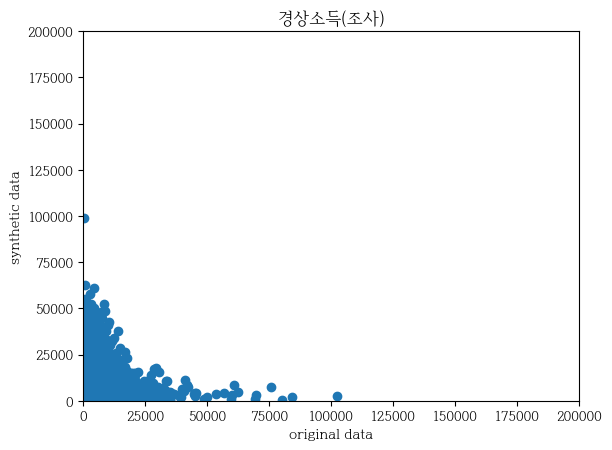

In [96]:
plt.scatter(normal_oridata['경상소득(조사)'], final_synthetic_data['경상소득(조사)'])
plt.title('경상소득(조사)')
plt.xlim(0,200000)
plt.ylim(0,200000)
plt.xlabel("original data")
plt.ylabel("synthetic data")
plt.show()

([<matplotlib.axis.XTick at 0x230b883d910>,
 [Text(1, 0, 'original_data'), Text(2, 0, 'synthetic_data')])

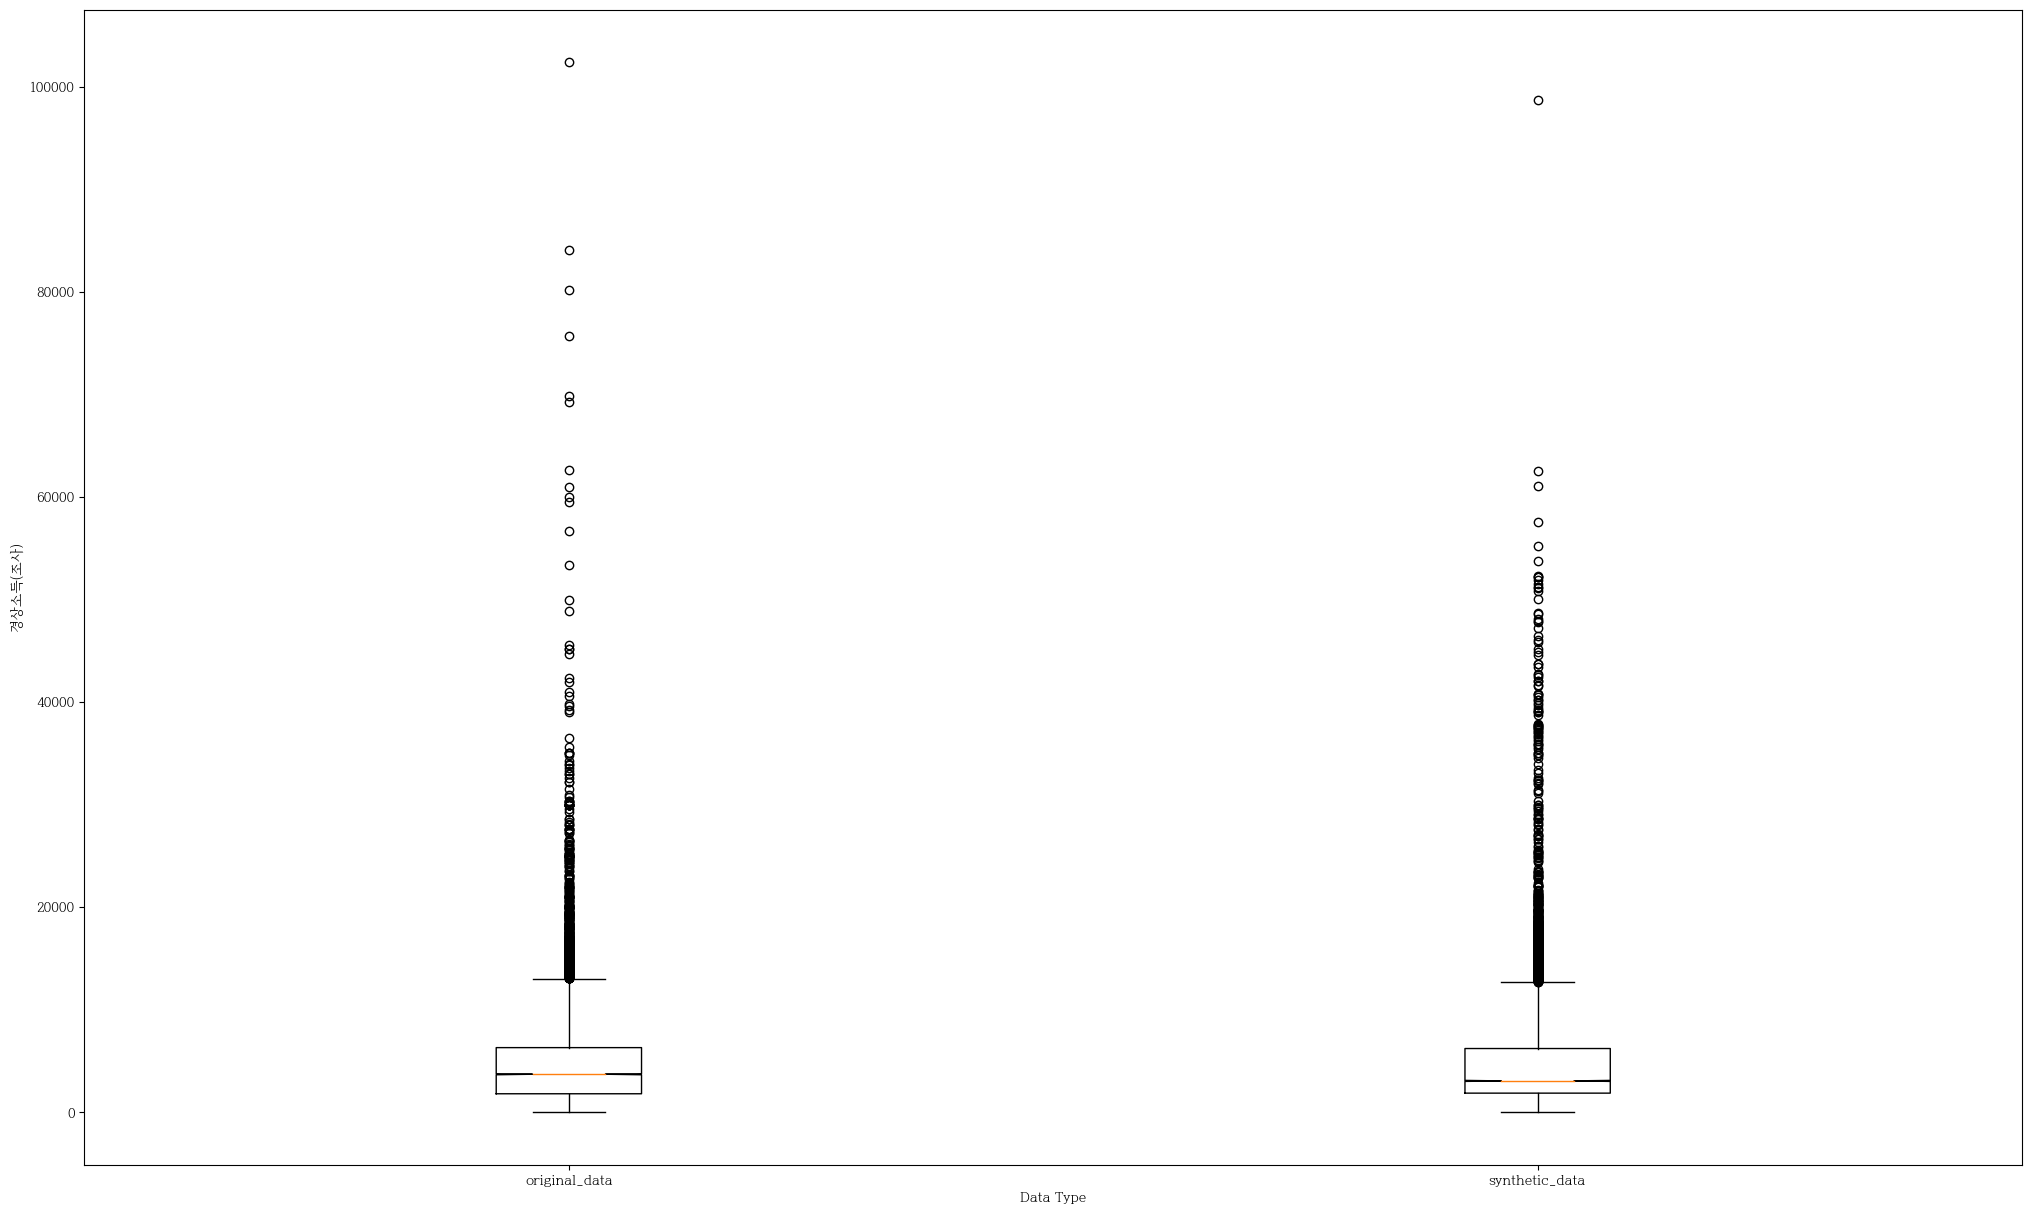

In [97]:
plt.rcParams['figure.figsize'] = [25, 15]
fig, ax = plt.subplots()
ax.boxplot([all_oridata['경상소득(조사)'],final_synthetic_data['경상소득(조사)']],notch=True)
ax.set_xlabel('Data Type')
ax.set_ylabel('경상소득(조사)')
plt.xticks([1,2], ['original_data','synthetic_data'])

([<matplotlib.axis.XTick at 0x230b888eb20>,
 [Text(1, 0, 'original_data'), Text(2, 0, 'synthetic_data')])

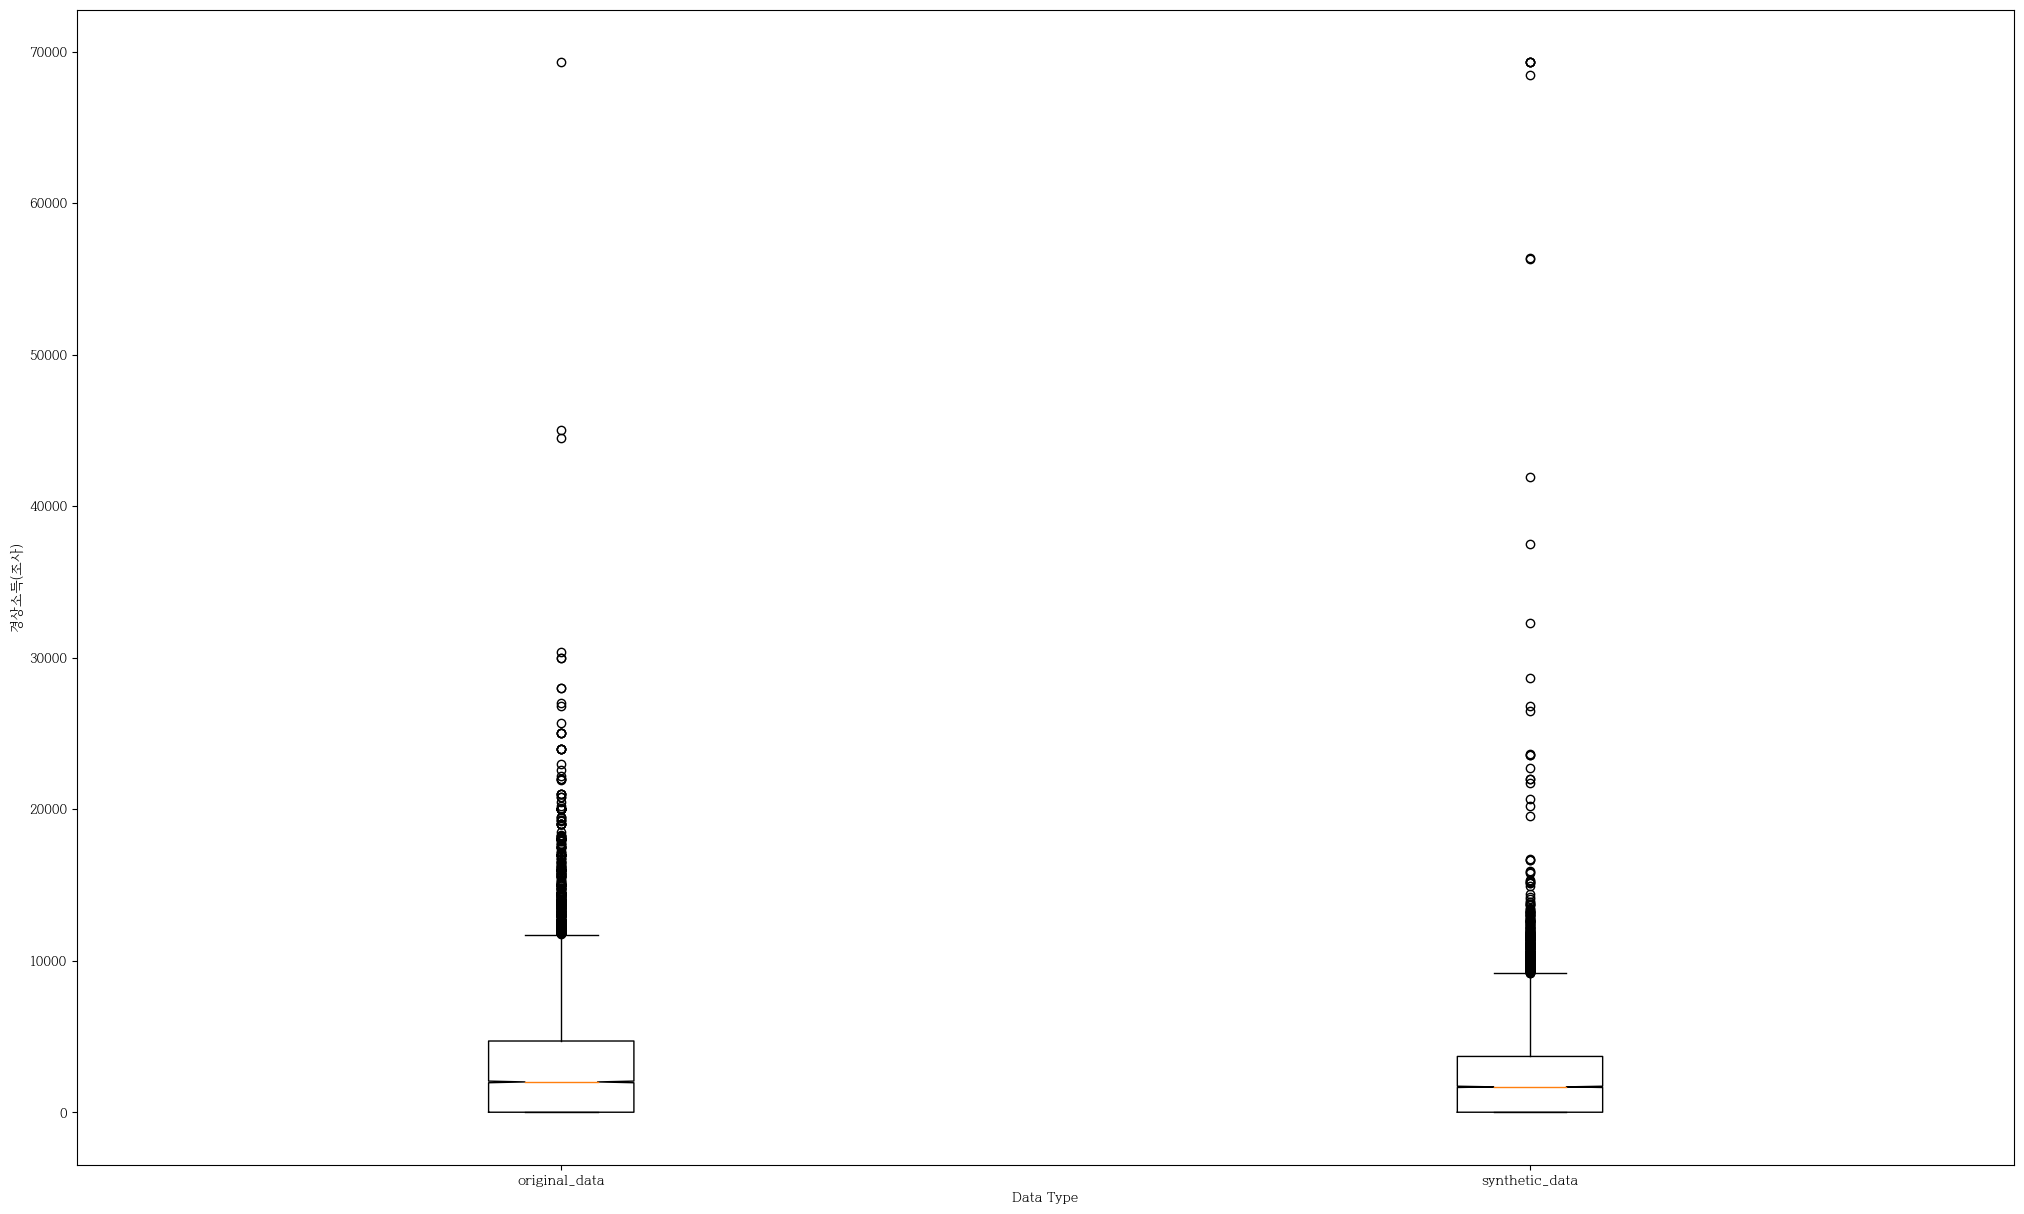

In [98]:
plt.rcParams['figure.figsize'] = [25, 15]
fig, ax = plt.subplots()
ax.boxplot([all_oridata['경상소득_근로소득(조사)'],final_synthetic_data['경상소득_근로소득(조사)']],notch=True)
ax.set_xlabel('Data Type')
ax.set_ylabel('경상소득(조사)')
plt.xticks([1,2], ['original_data','synthetic_data'])

Text(0.5, 1.0, '전체재현자료')

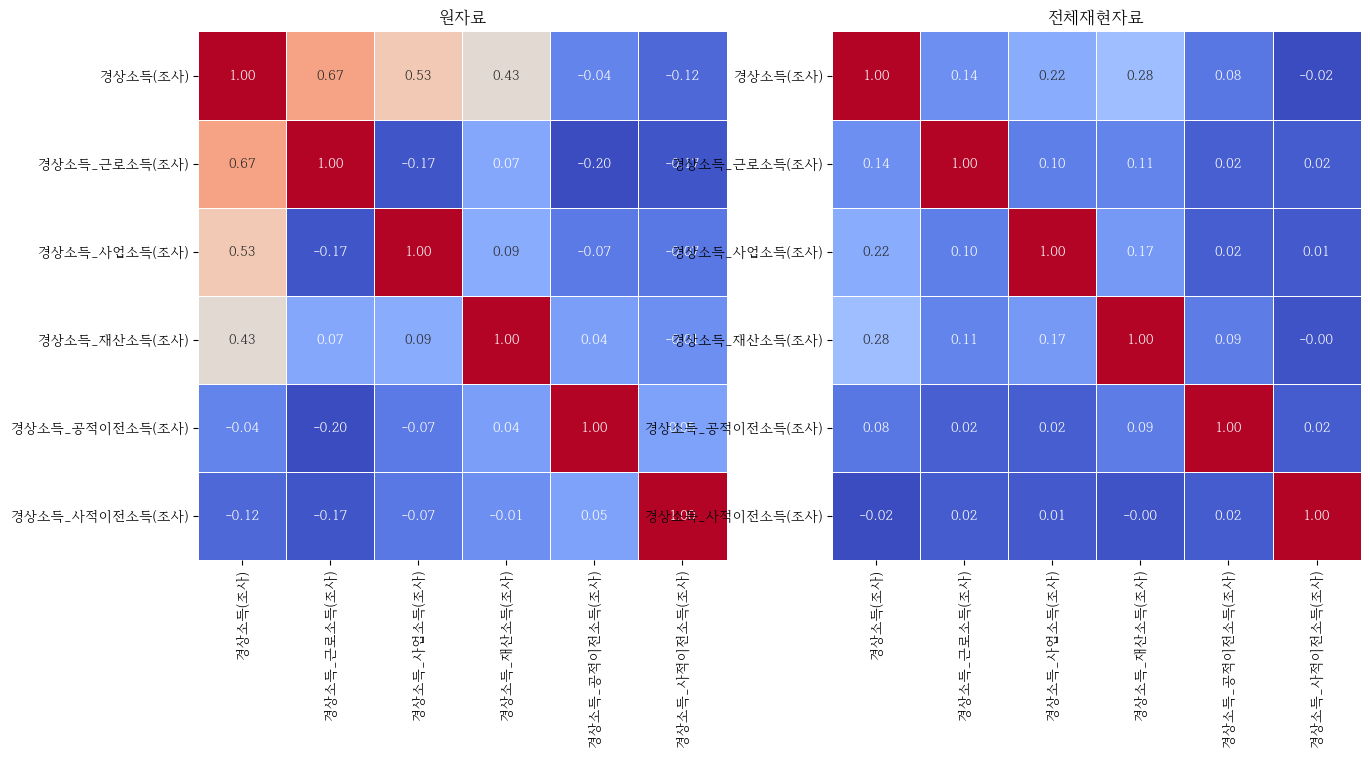

In [106]:
plt.subplot(1,2,1)
plt.rcParams["figure.figsize"] = (10,10)
sns.heatmap(all_oridata.iloc[:,5:11].corr(),annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, square=True , cbar = False)
plt.title("원자료")

plt.subplot(1,2,2)
sns.heatmap(final_synthetic_data.iloc[:,1:7].corr(),annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, square=True, cbar = False)
plt.title("전체재현자료")